# Momentum

A stock that's going up tends to keep going up...until it doesn't.  Momentum is the theory that stocks that have recently gone up will keep going up disproportionate to their underlying value because folks are overenthusiastic about them.

    1. The SPY is higher than X days ago, buy
    2. If the SPY is lower than X days ago, sell your long position.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
#symbol = 'OIH'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Define lookback period in months

In [4]:
period = None

Run Strategy

In [5]:
s = strategy.Strategy(symbol, capital, start, end, period, margin=1)
s.run()

Retrieve log DataFrames

In [6]:
tlog, dbal = s.get_logs()
stats = s.get_stats()

In [7]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
22,2015-12-28,187.11,2016-01-04,183.29,-3.82,-1711.60,448,72242.59,LONG,SPY
23,2016-03-07,182.90,2016-05-16,189.52,6.62,2970.84,449,75213.42,LONG,SPY
24,2016-05-23,188.08,2016-06-27,183.89,-4.19,-1898.20,453,73315.22,LONG,SPY
25,2016-07-05,192.00,2018-07-02,260.33,68.32,29584.35,433,102899.57,LONG,SPY
26,2018-07-09,266.11,2018-10-15,263.95,-2.16,-916.71,424,101982.86,LONG,SPY
27,2018-10-22,264.54,2018-12-17,245.63,-18.90,-7995.38,423,93987.49,LONG,SPY
28,2019-01-22,254.33,2019-01-28,255.20,0.87,355.29,408,94342.77,LONG,SPY
29,2019-02-19,268.83,2019-05-13,272.94,4.11,1594.37,388,95937.14,LONG,SPY
30,2019-05-20,275.94,2019-05-28,272.25,-3.69,-1414.36,383,94522.78,LONG,SPY
31,2019-06-10,280.82,2020-03-09,270.35,-10.47,-3894.36,372,90628.42,LONG,SPY


In [8]:
dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2020-10-12,122759.48,121043.33,122209.34,346,268.57,1.00,-
2020-10-13,122223.19,121053.71,121413.55,346,268.57,1.00,-
2020-10-14,122036.34,120379.01,120652.34,346,268.57,1.00,-
2020-10-15,120683.48,118991.55,120503.57,346,268.57,1.00,-
2020-10-16,121628.07,120365.17,120430.91,346,268.57,1.00,-


Generate strategy stats - display all available stats

In [9]:
pf.print_full(stats)

start                                                   1994-07-05
end                                                     2020-10-16
beginning_balance                                            10000
ending_balance                                           120430.91
total_net_profit                                          90628.42
gross_profit                                             114960.44
gross_loss                                               -24332.02
profit_factor                                                 4.72
return_on_initial_capital                                   906.28
annual_return_rate                                            9.93
trading_period                           26 years 3 months 11 days
pct_time_in_market                                           81.17
margin                                                           1
avg_leverage                                                  1.00
max_leverage                                                  

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [10]:
benchmark = pf.Benchmark(symbol, capital, s.start, s.end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1994-07-05 00:00:00 BUY  223 SPY @ 44.80
2020-10-16 00:00:00 SELL 223 SPY @ 347.29


Plot Equity Curves: Strategy vs Benchmark

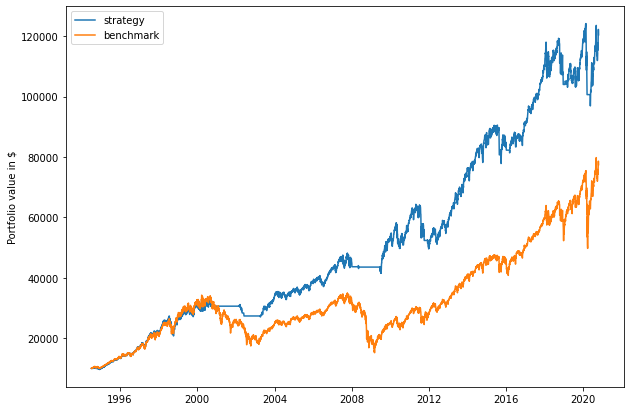

In [11]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

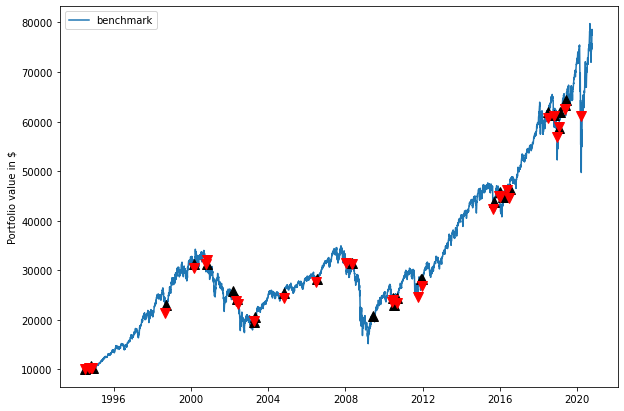

In [12]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,9.93,8.10
max_closed_out_drawdown,-24.10,-56.46
drawdown_annualized_return,-2.43,-6.97
drawdown_recovery,-0.23,-1.42
best_month,17.77,23.07
worst_month,-18.94,-31.39
sharpe_ratio,0.77,0.50
sortino_ratio,0.87,0.64
monthly_std,3.43,4.58
annual_std,12.74,16.68


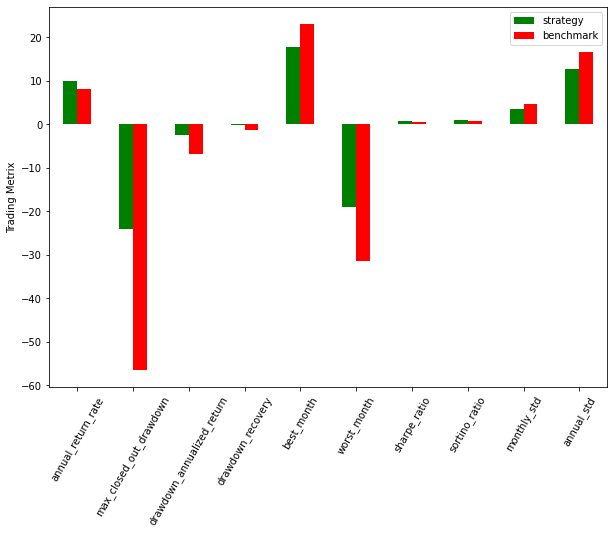

In [13]:
df = pf.plot_bar_graph(stats, benchmark.stats)
df

In [14]:
returns = dbal['close']
returns.tail()

date
2020-10-12   122209.34
2020-10-13   121413.55
2020-10-14   120652.34
2020-10-15   120503.57
2020-10-16   120430.91
Name: close, dtype: float64

In [15]:
benchmark_returns = benchmark.dbal['close']
benchmark_returns.tail()

date
2020-10-12   78602.19
2020-10-13   78089.29
2020-10-14   77598.69
2020-10-15   77502.80
2020-10-16   77455.97
Name: close, dtype: float64

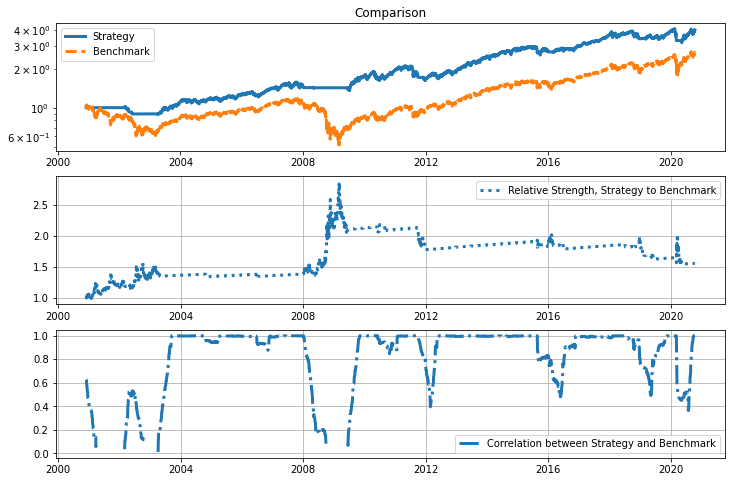

In [16]:
pf.prettier_graphs(returns, benchmark_returns, label1='Strategy', label2='Benchmark', points_to_plot=5000)